In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# imports

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [2]:
# Load sequences and labels from disk

sequences = np.load('../sequences.npy')
labels = np.load('../labels.npy')

sequences_augmented = np.load('../sequences_augmented.npy')
labels_augmented = np.load('../labels_augmented.npy')
################!!!!!!!!!!!!!!!!!!!!! they are now nparrays instead of lists, so no need to convert them to nparrays again in the code below

In [3]:
X = sequences_augmented
y= to_categorical(labels_augmented).astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)    

In [5]:
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.callbacks import TensorBoard

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)


In [6]:
# With Regularization

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

from sklearn.model_selection import KFold

# Define the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(30, 1662), dropout=0.2))  # LSTM layer with dropout
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))  # LSTM layer with L2 regularization
model.add(LSTM(128, kernel_regularizer=l2(0.01)))  # LSTM layer with L2 regularization
model.add(Dense(65, activation='softmax'))  # Output layer matches the number of classes

# Compile the model
optimizer = Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

kf = KFold(n_splits=3, shuffle=True)

test_scores = []
## Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=100, validation_data=(X_val_fold, y_val_fold),
              callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    test_scores.append(test_accuracy)

# Print the average test accuracy across all folds
print("Average Test Accuracy: %.2f%%" % (sum(test_scores) / len(test_scores) * 100))

C:\Users\Steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.0233 - loss: 6.3630 - val_accuracy: 0.0354 - val_loss: 4.0727
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.0589 - loss: 3.8994 - val_accuracy: 0.0687 - val_loss: 3.6461
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.0681 - loss: 3.6074 - val_accuracy: 0.0800 - val_loss: 3.6983
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.0993 - loss: 3.4924 - val_accuracy: 0.1364 - val_loss: 3.3409
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.1452 - loss: 3.2554 - val_accuracy: 0.1867 - val_loss: 3.1109
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.1844 - loss: 3.0096 - val_accuracy: 0.2410 - val_loss: 2.8297
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.2207 - loss: 2.9188 - val_accuracy: 0.2595 - val_loss: 2.7122
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.2400 - loss: 2.7758 -

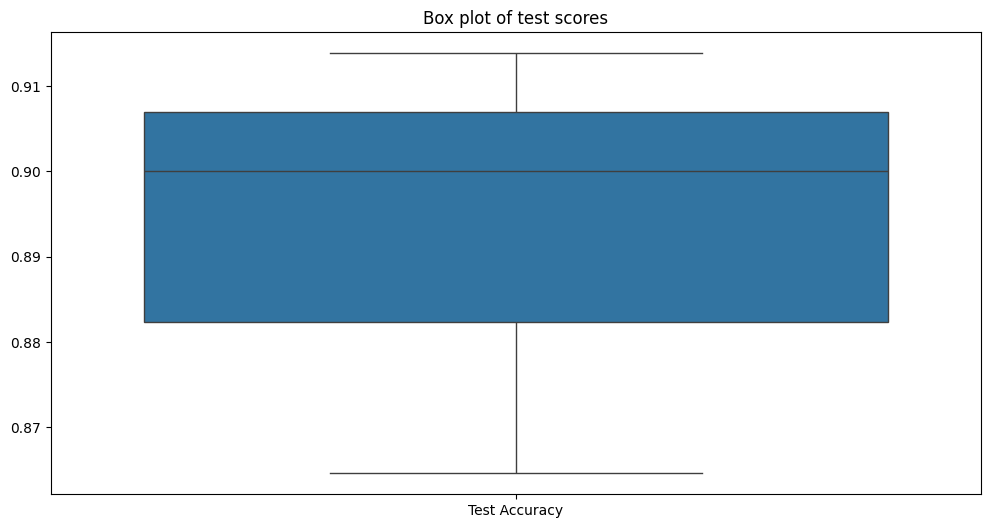

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the list of test scores into a DataFrame
test_scores_df = pd.DataFrame(test_scores, columns=['Test Accuracy'])

# Draw a box plot of the test scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=test_scores_df)
plt.title('Box plot of test scores')
plt.show()

In [8]:
model.save('../actions/actions_triple_lstm.h5')  

In [9]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix


y_pred = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(y_pred, axis=1).tolist()

print(accuracy_score(ytrue, ypred))
multilabel_confusion_matrix(ytrue, ypred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
0.9


array([[[635,   1],
        [  2,  12]],

       [[636,   4],
        [  6,   4]],

       [[629,   5],
        [  5,  11]],

       [[637,   0],
        [  0,  13]],

       [[633,   4],
        [  2,  11]],

       [[639,   0],
        [  0,  11]],

       [[639,   4],
        [  2,   5]],

       [[638,   3],
        [  0,   9]],

       [[643,   1],
        [  1,   5]],

       [[646,   0],
        [  0,   4]],

       [[637,   2],
        [  3,   8]],

       [[641,   1],
        [  3,   5]],

       [[641,   1],
        [  0,   8]],

       [[638,   0],
        [  2,  10]],

       [[636,   3],
        [  1,  10]],

       [[639,   1],
        [  1,   9]],

       [[639,   0],
        [  0,  11]],

       [[638,   2],
        [  4,   6]],

       [[637,   2],
        [  0,  11]],

       [[645,   0],
        [  1,   4]],

       [[643,   0],
        [  0,   7]],

       [[640,   1],
        [  1,   8]],

       [[641,   2],
        [  0,   7]],

       [[640,   0],
        [  2, 